# Что делаем #
Имеем набор данных о продажах из магазина SkyMarket, содержащий информацию о товарах, их ценах и количестве проданных единиц.

Изучим характеристики продаж в различных категориях и сегментах.

Проведем анализ зависимости между типом клиента и средним чеком, а также исследование различий в среднем чеке по категориям товаров.

Рассчитаем коэффициент корреляции между ценой (Unit price) и рейтингом товара (Rating) для всего датафрейма, а также отдельно для каждого сегмента (Product line). Найдем статистически значимую корреляцию.

Рассчитаем коэффициент корреляции между ценой (Unit price) и выручкой (Total_price) по всему датафрейму.

In [1]:
### Импортируем библиотеки и данные

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
from scipy.stats import pearsonr, spearmanr

df = pd.read_excel('SkyMarket_data.xlsx')
df.head()

,ID,Customer type,Gender,Product line,Unit price,Quantity,Total_price,Date,Payment,Rating
0,750-67-8428,Member,Female,Health and beauty,74.69,7,522.83,2019-05-28,Ewallet,5.0
1,226-31-3081,VIP,Female,Electronic accessories,15.28,5,76.40,2019-11-29,Cash,3.1
2,631-41-3108,VIP,Female,Home and lifestyle,46.33,7,324.31,2019-03-23,Credit card,3.2
3,123-19-1176,Member,Female,Health and beauty,58.22,8,465.76,2019-10-19,Ewallet,5.0
4,373-73-7910,Member,Female,Sports and travel,86.31,7,604.17,2019-03-26,Ewallet,5.0


### Проверяем данные ###

In [2]:
### Проверяем данные

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             721 non-null    object        
 1   Customer type  721 non-null    object        
 2   Gender         721 non-null    object        
 3   Product line   721 non-null    object        
 4   Unit price     721 non-null    float64       
 5   Quantity       721 non-null    int64         
 6   Total_price    721 non-null    float64       
 7   Date           721 non-null    datetime64[ns]
 8   Payment        721 non-null    object        
 9   Rating         721 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 56.5+ KB


видим, что преобразование и корректировка данных не требуются

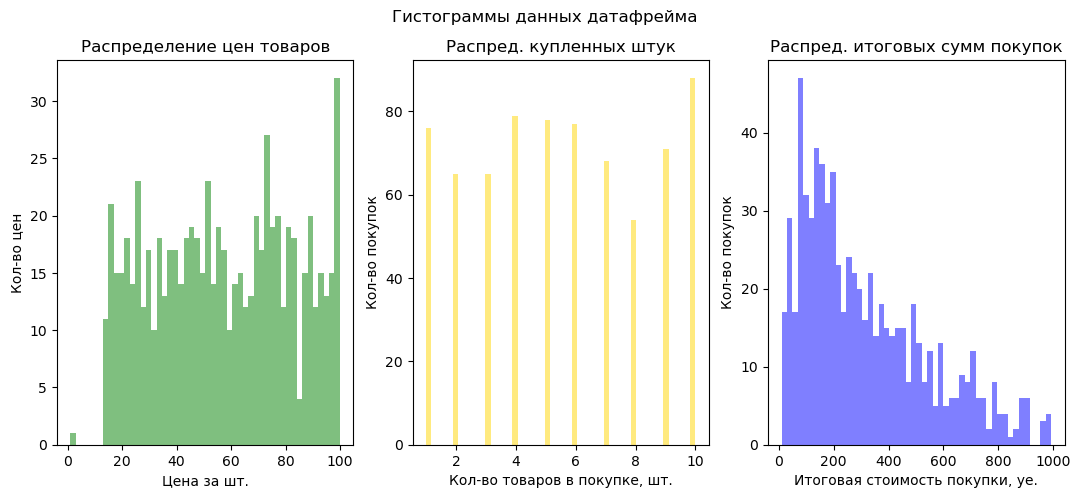

In [3]:
### Строим гистрграммы для столбцов

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (13,5))
fig.suptitle('Гистограммы данных датафрейма')

ax1.hist(df['Unit price'], bins=50, color = 'green', alpha=.5)
ax1.set_title('Распределение цен товаров')
ax1.set_xlabel('Цена за шт.')
ax1.set_ylabel('Кол-во цен')

ax2.hist(df['Quantity'], bins=50, color = 'gold', alpha=.5)
ax2.set_title('Распред. купленных штук')
ax2.set_xlabel('Кол-во товаров в покупке, шт.')
ax2.set_ylabel('Кол-во покупок')

ax3.hist(df['Total_price'], bins=50, color = 'blue', alpha=.5)
ax3.set_title('Распред. итоговых сумм покупок')
ax3.set_xlabel('Итоговая стоимость покупки, уе.')
ax3.set_ylabel('Кол-во покупок')

plt.show()

видим, что данные не распределены нормально

In [4]:
### Создадим выборки в разбивке по типам клиентов, расчитываем средние и медианы

df_memb = df[df['Customer type'] == 'Member']
df_memb['Total_price'].describe()

count    420.000000
mean     336.139738
std      236.011731
min       10.000000
25%      145.545000
50%      281.310000
75%      495.772500
max      993.000000
Name: Total_price, dtype: float64

In [5]:

df_vip = df[df['Customer type'] == 'VIP']
df_vip['Total_price'].describe()

count    301.000000
mean     285.700498
std      219.116649
min       15.340000
25%      126.440000
50%      214.550000
75%      396.000000
max      989.800000
Name: Total_price, dtype: float64

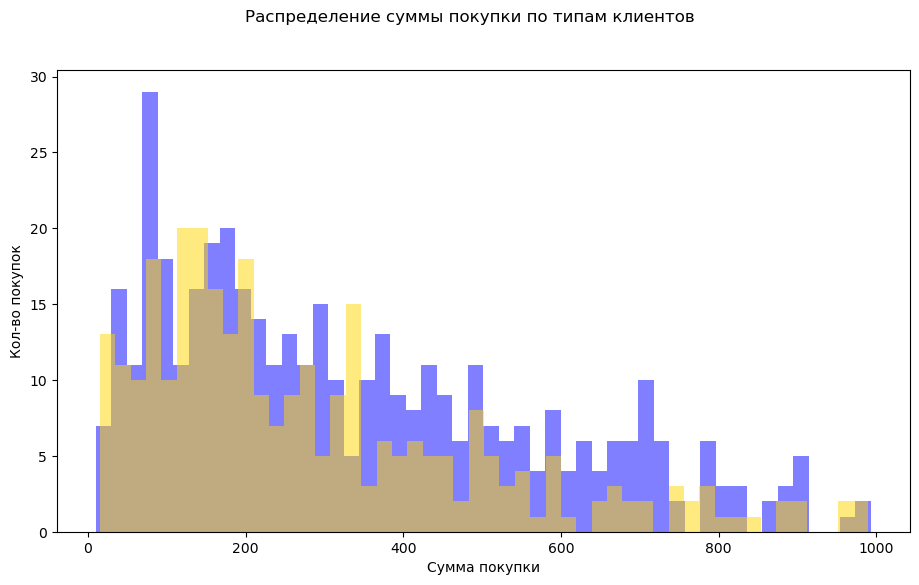

In [6]:
### Построим гистограммы для визуализации распределения суммы покупки по типам клиентов

plt.rcParams["figure.figsize"] = (11,6)

fig, ax = plt.subplots()
fig.suptitle('Распределение суммы покупки по типам клиентов')
ax.hist(df_memb['Total_price'], bins=50, color = 'blue', alpha=.5)
ax.hist(df_vip['Total_price'], bins=50, color = 'gold', alpha=.5)
ax.set_xlabel("Сумма покупки")
ax.set_ylabel("Кол-во покупок")
plt.show()

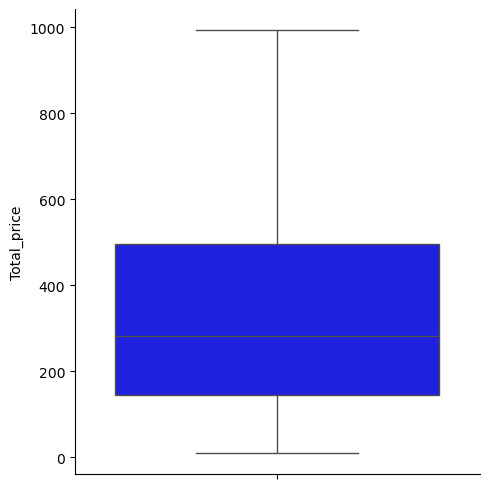

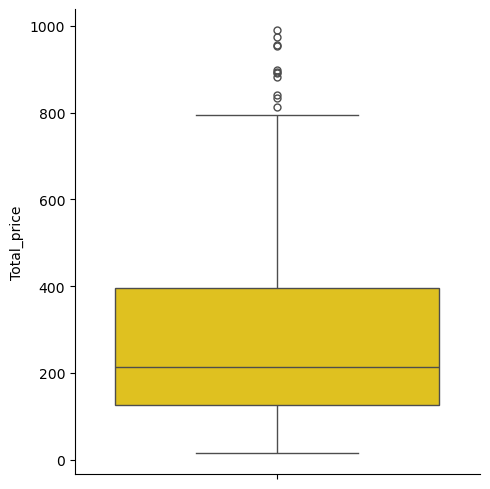

In [7]:
### Посмотрим на "ящике с усами" распределение сумм покупки по типам клиентов

sns.catplot(data = df_memb['Total_price'], kind="box", color = 'blue')
sns.catplot(data = df_vip['Total_price'], kind="box", color = 'gold')
plt.show()

видим, что данные не распределены нормально, есть и "усы(хвосты)" и выбросы

In [8]:
### Сравним распределение сумм покупки по типам клиентов

mw_stat, p_value = mannwhitneyu(x = df_memb['Total_price'], y = df_vip['Total_price'])
print(mw_stat)
print(p_value)

71141.0
0.004033765804280748


In [9]:

alpha = 0.05
if p_value >= alpha:
  print(f'Принимаем H0 - нет стат. значимой разницы между выборками. p value = {p_value}')
else:
  print(f'Принимаем H1 - видим стат. значимую разницу между выборками. p value = {p_value}')

Принимаем H1 - видим стат. значимую разницу между выборками. p value = 0.004033765804280748


## Вывод ##
на основании средних и медиан, а так же статистической проверки можем утверждать, что средний чек у клиентов разных типов различается. У VIP-клиентов он ниже, чем у обычных.

In [10]:
### Создадим выборки в разбивке по категориям продуктов, расчитываем средние и медианы

df_fd_and_bv = df[df['Product line'] == 'Food and beverages']
df_fd_and_bv['Total_price'].describe()

count    128.000000
mean     333.329063
std      237.837482
min       21.580000
25%      156.450000
50%      278.610000
75%      484.077500
max      985.200000
Name: Total_price, dtype: float64

In [11]:

df_sp_and_tr = df[df['Product line'] == 'Sports and travel']
df_sp_and_tr['Total_price'].describe()

count    128.000000
mean     326.125391
std      228.496088
min       15.340000
25%      142.612500
50%      275.325000
75%      462.682500
max      954.400000
Name: Total_price, dtype: float64

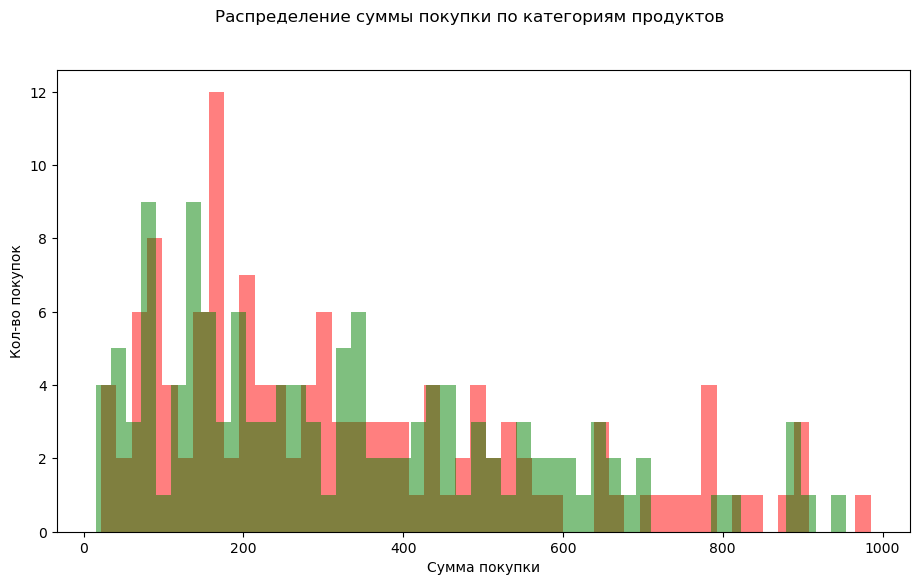

In [12]:
### Построим гистограммы для визуализации распределения суммы покупки по категориям продуктов

plt.rcParams["figure.figsize"] = (11,6)

fig, ax = plt.subplots()
fig.suptitle('Распределение суммы покупки по категориям продуктов')
ax.hist(df_fd_and_bv['Total_price'], bins=50, color = 'red', alpha=.5)
ax.hist(df_sp_and_tr['Total_price'], bins=50, color = 'green', alpha=.5)
ax.set_xlabel("Сумма покупки")
ax.set_ylabel("Кол-во покупок")
plt.show()

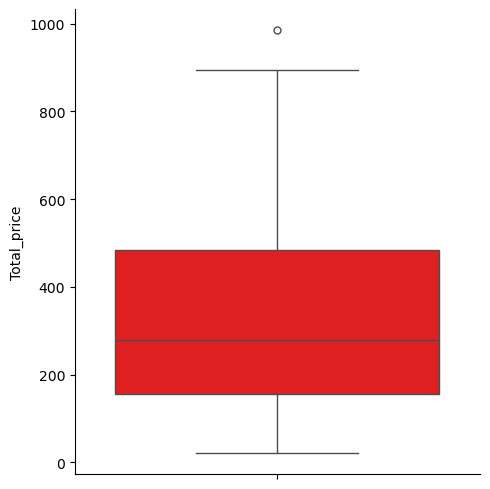

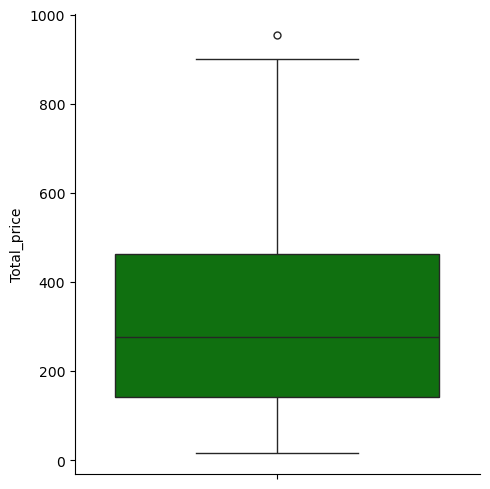

In [13]:

### Посмотрим на "ящике с усами" распределение сумм покупки по категориям продуктов

sns.catplot(data = df_fd_and_bv['Total_price'], kind="box", color = 'red')
sns.catplot(data = df_sp_and_tr['Total_price'], kind="box", color = 'green')
plt.show()

видим, что данные не распределены нормально, есть и "усы(хвосты)" и выбросы

In [14]:
### Сравним распределение сумм покупки по категориям продуктов

mw_stat1, p_value1 = mannwhitneyu(x = df_fd_and_bv['Total_price'], y = df_sp_and_tr['Total_price'])
print(mw_stat1)
print(p_value1)

8291.0
0.8679334759288438


In [15]:

alpha = 0.05
if p_value1 >= alpha:
  print(f'Принимаем H0 - нет стат. значимой разницы между выборками. p value = {p_value1}')
else:
  print(f'Принимаем H1 - видим стат. значимую разницу между выборками. p value = {p_value1}')

Принимаем H0 - нет стат. значимой разницы между выборками. p value = 0.8679334759288438


## Вывод ##
на основании средних и медиан, а так же статистической проверки можем утверждать, что средний чек по категориям продуктов "Food and beverages" и "Sports and travel" не различается.

In [16]:
### Функция, которая будет считать корреляцию Пирсона и Спирмена и выводить график рассеивания

def stat_ch(x_1, x_2, alpha = 0.05):
    corr_v_p, pvalue_v_p = pearsonr(x_1, x_2)
    print(f'Корреляция Пирсона. Коэффициент = {corr_v_p}. Статистическая значимость = {pvalue_v_p}.')
    print()
    print(f'Cтатистически ли значима корреляция между двумя переменными?')
    if pvalue_v_p < alpha:
        print(f'ДА по Пирсону')
    else:
        print(f'НЕТ по Пирсону')
    print()
    
    corr_v_s, pvalue_v_s = spearmanr(x_1, x_2)
    print(f'Корреляция Спирмена. Коэффициент = {corr_v_s}. Статистическая значимость = {pvalue_v_s}.')
    print()
    print(f'Cтатистически ли значима корреляция между двумя переменными?')
    if pvalue_v_s < alpha:
        print(f'ДА по Спирмену')
    else:
        print(f'НЕТ по Спирмену')

    print()
 
    sns.scatterplot(data = x_1, color = 'red', label = 'Цена за шт.')
    sns.scatterplot(data = x_2, color = 'green', label = 'Рейтинг покупки')
    plt.xlabel('Кол-во')
    plt.ylabel('Значение цены и рейтинга')
    plt.title('Распределение цен на товар и рейтинга покупок')
    
    plt.show()

Корреляция Пирсона. Коэффициент = 0.2583278044270932. Статистическая значимость = 1.8633071267220548e-12.

Cтатистически ли значима корреляция между двумя переменными?
ДА по Пирсону

Корреляция Спирмена. Коэффициент = 0.2458767431538456. Статистическая значимость = 2.1757676905987137e-11.

Cтатистически ли значима корреляция между двумя переменными?
ДА по Спирмену



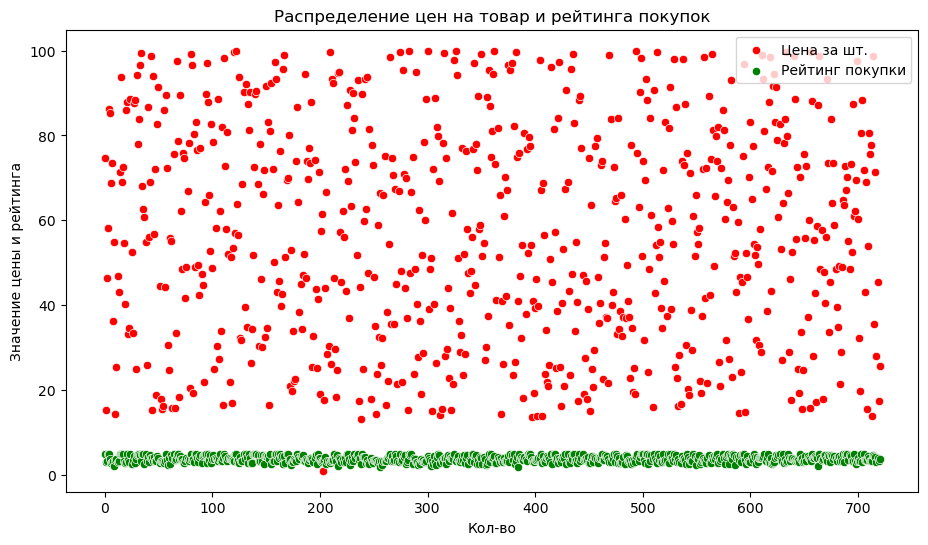

In [17]:
### Применяем функцию корреляции stat_ch к столбцам Unit price и Rating

stat_ch(df['Unit price'], df['Rating'], alpha = 0.05)

Для сегмента Health and beauty.

Корреляция Пирсона. Коэффициент = 0.8468727302740997. Статистическая значимость = 5.208858895943071e-30.

Cтатистически ли значима корреляция между двумя переменными?
ДА по Пирсону

Корреляция Спирмена. Коэффициент = 0.8575438118203111. Статистическая значимость = 1.6775860138378746e-31.

Cтатистически ли значима корреляция между двумя переменными?
ДА по Спирмену



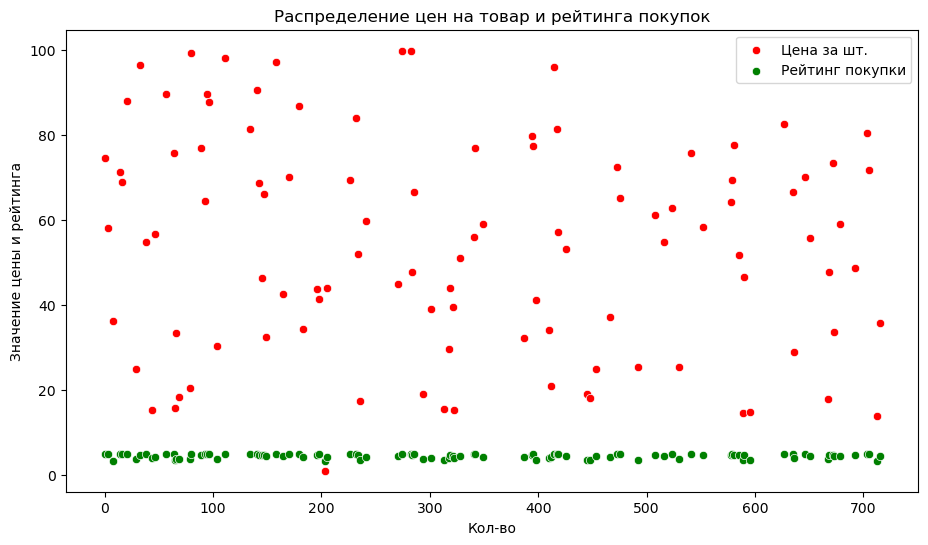

Для сегмента Electronic accessories.

Корреляция Пирсона. Коэффициент = -0.11258462248104169. Статистическая значимость = 0.23093289314003473.

Cтатистически ли значима корреляция между двумя переменными?
НЕТ по Пирсону

Корреляция Спирмена. Коэффициент = -0.09148892510867958. Статистическая значимость = 0.3308353045906144.

Cтатистически ли значима корреляция между двумя переменными?
НЕТ по Спирмену



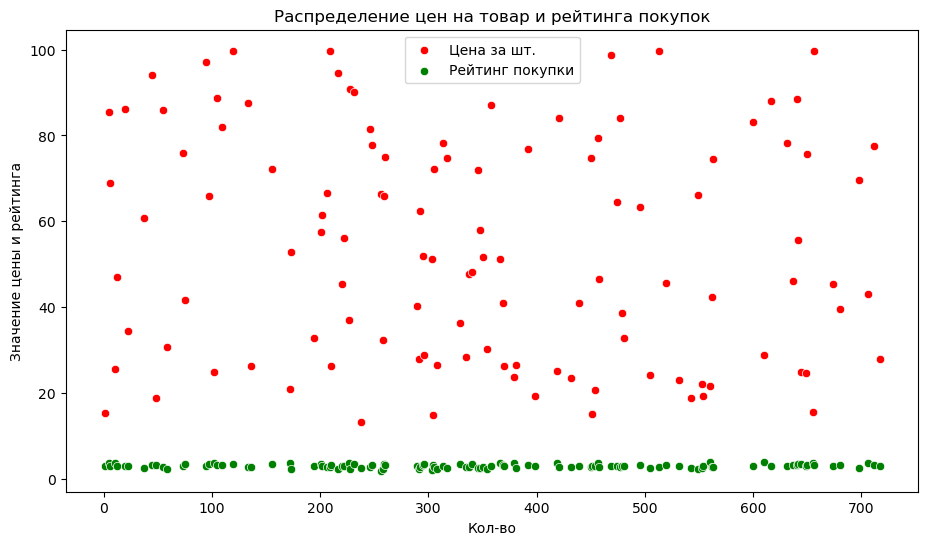

Для сегмента Home and lifestyle.

Корреляция Пирсона. Коэффициент = -0.10722128385570033. Статистическая значимость = 0.2626749182427617.

Cтатистически ли значима корреляция между двумя переменными?
НЕТ по Пирсону

Корреляция Спирмена. Коэффициент = -0.12726111694805456. Статистическая значимость = 0.1831823693970457.

Cтатистически ли значима корреляция между двумя переменными?
НЕТ по Спирмену



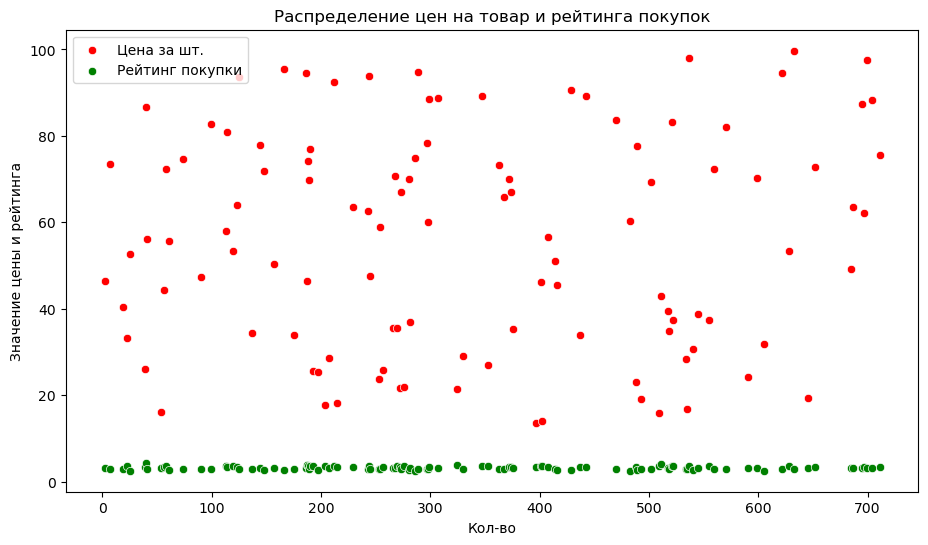

Для сегмента Sports and travel.

Корреляция Пирсона. Коэффициент = 0.8471267263938799. Статистическая значимость = 2.1076564082944723e-36.

Cтатистически ли значима корреляция между двумя переменными?
ДА по Пирсону

Корреляция Спирмена. Коэффициент = 0.8952226903994207. Статистическая значимость = 4.651115812935109e-46.

Cтатистически ли значима корреляция между двумя переменными?
ДА по Спирмену



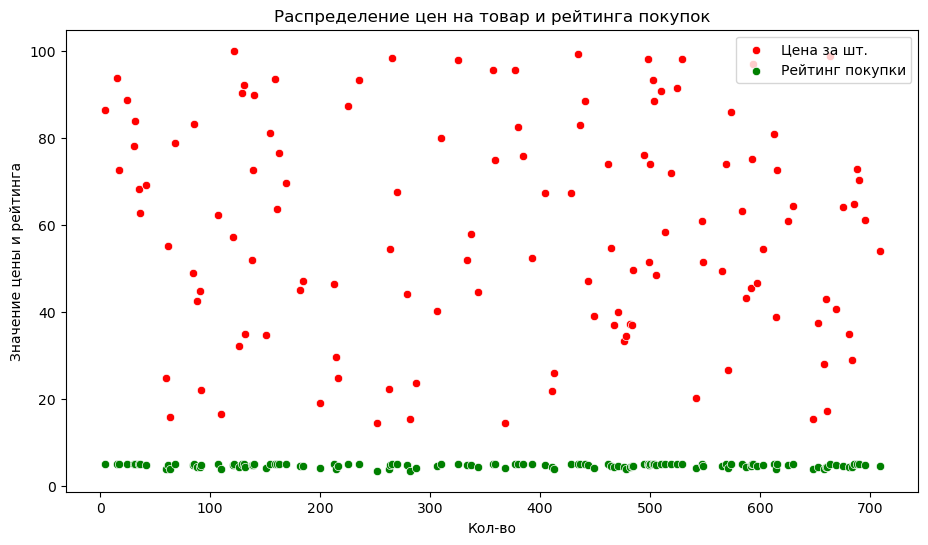

Для сегмента Food and beverages.

Корреляция Пирсона. Коэффициент = 0.06273533087820403. Статистическая значимость = 0.481744227368538.

Cтатистически ли значима корреляция между двумя переменными?
НЕТ по Пирсону

Корреляция Спирмена. Коэффициент = 0.05660838454229602. Статистическая значимость = 0.5256388976297917.

Cтатистически ли значима корреляция между двумя переменными?
НЕТ по Спирмену



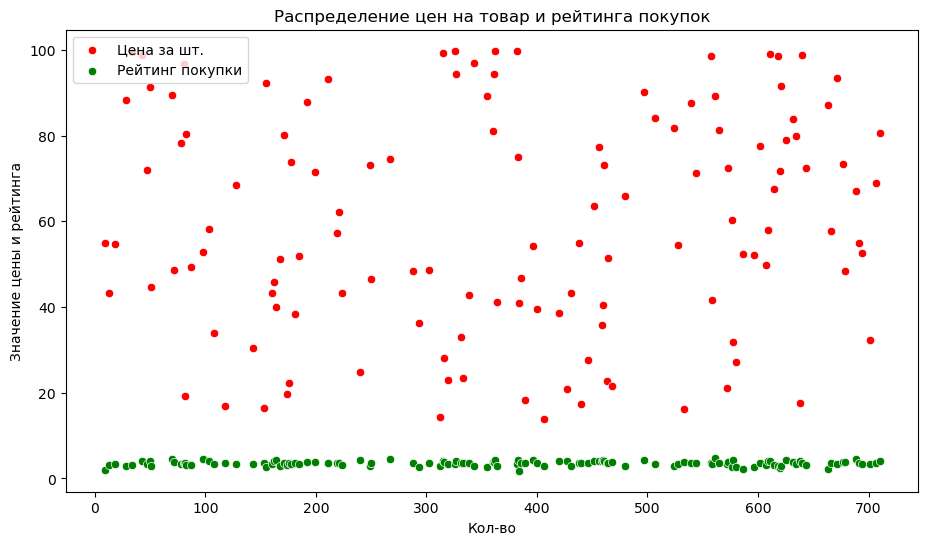

Для сегмента Fashion accessories.

Корреляция Пирсона. Коэффициент = 0.7834374459288267. Статистическая значимость = 4.7460470194169406e-29.

Cтатистически ли значима корреляция между двумя переменными?
ДА по Пирсону

Корреляция Спирмена. Коэффициент = 0.7981325042769744. Статистическая значимость = 7.754279357178055e-31.

Cтатистически ли значима корреляция между двумя переменными?
ДА по Спирмену



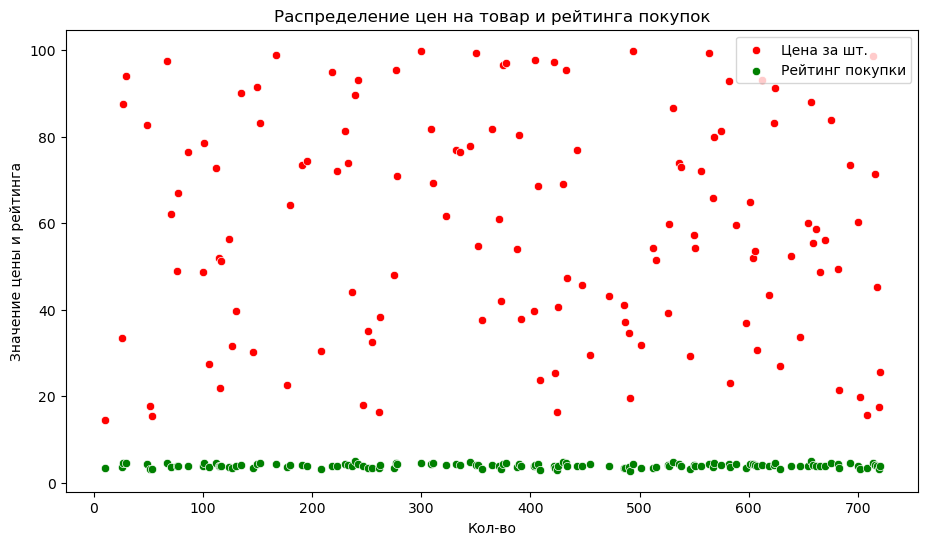

In [18]:
### Применяем функцию корреляции stat_ch отдельно для каждого сегмента, используя цикл по уникальным значениям колонки Product line

prod_line = df['Product line'].unique()

for z in prod_line:
    print(f'Для сегмента {z}.')
    print()
    dff = df[df['Product line'] == z]
    stat_ch(dff['Unit price'], dff['Rating'], alpha = 0.05)

## Вывод ##
Статистически значимая корреляция наблюдается для сегментов "Health and beauty", "Sports and travel", "Fashion accessories".

Статистически значимой корреляции для сегментов "Electronic accessories", "Home and lifestyle", "Food and beverages" не наблюдается.

Предложение - товары с высоким рейтингом можно продавать дороже, можно отображать рейтинг товаров(отзывы) для потенциальных покупателей, чтобы побудить их приобрести более дорогие товары. Товары с низким рейтингом и низкой ценой можно выводить из ассортимента. Безусловно стоит обратить внимание на закупочную цену товара.
Для категорий "Electronic accessories", "Home and lifestyle", "Food and beverages": можно предположить, что рейтинг не влияет на покупку в этих категориях, поскольку обучловлен необходимостью в электронике, обустройстве быта(уюта), питании.

Корреляция Пирсона. Коэффициент = 0.608772567879047. Статистическая значимость = 2.5183321119009025e-74.

Cтатистически ли значима корреляция между двумя переменными?
ДА по Пирсону

Корреляция Спирмена. Коэффициент = 0.5953271508138367. Статистическая значимость = 2.3767205898963485e-70.

Cтатистически ли значима корреляция между двумя переменными?
ДА по Спирмену



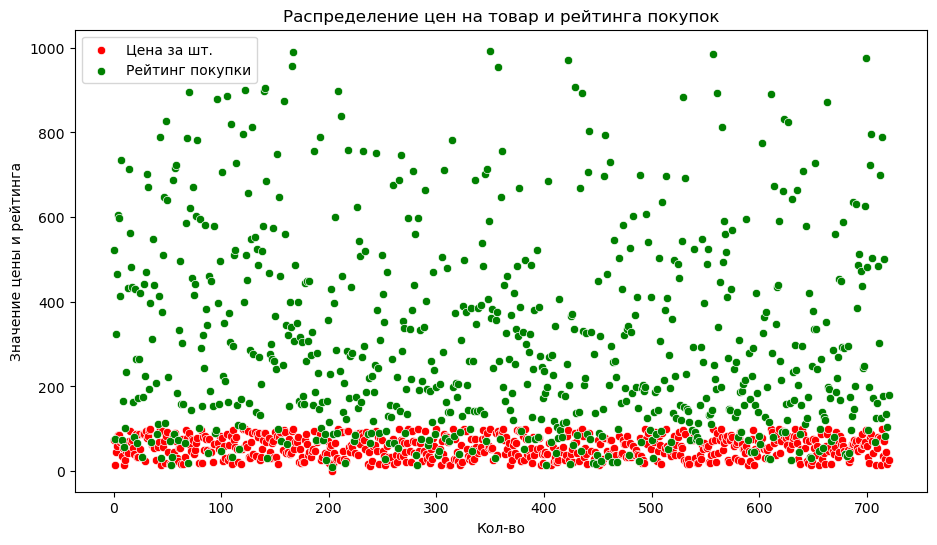

In [19]:
### Применяем функцию корреляции stat_ch к столбцам Unit price и Total_price

stat_ch(df['Unit price'], df['Total_price'], alpha = 0.05)

## Вывод ##
Проверка и показывает статистически значимую корреляцию между выборками, поскольку выборки зависимые - на итоговую стоимость(т.е. значение выборки итоговой стоимости) влияют значения выборки цены за штуку.